**CODES FOR PROJECT 1**   
Author: Urszula Maria Starowicz   
MOD600  
05.02.2025  

In [ ]:
#   IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import time
import sys

Linear problem I

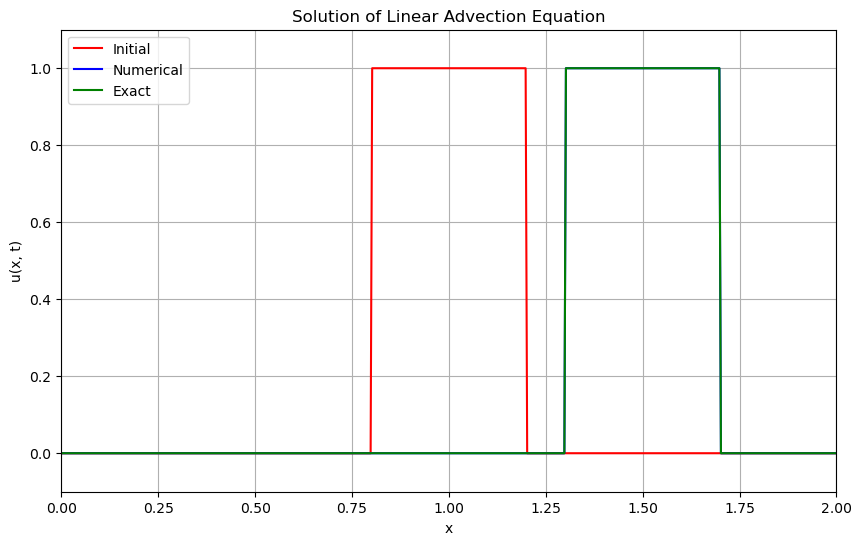

In [5]:
# Parameters
T = 0.5
a = 1.0
M = 500  # Number of grid cells
Ldom = 2.0  # Length of the domain
dx = Ldom / M
x = np.arange(dx * 0.5, Ldom + 0.5 * dx, dx)
dt = dx
NTime = int(T/dt)

# Initial condition
def fun_initial(x):
    v = np.zeros_like(x)
    L = np.logical_and(x >= 0.8, x <= 1.2)
    v[L] = 1.0
    return v

u0 = fun_initial(x)

# Numerical solution setup
u = np.zeros(M)
u_old = np.copy(u0)
lambda_1 = dt / dx

# CFL check
if lambda_1 * a > 1:
    raise ValueError("CFL condition violated. Adjust dt or dx.")

# Time-stepping loop
for _ in range(NTime):
    u[1:-1] = u_old[1:-1] - a * lambda_1 * (u_old[1:-1] - u_old[:-2])
    u[0], u[-1] = u0[0], u0[-1]
    u_old[:] = u

# Exact solution
y = (x - a * T) % Ldom
u_exact = fun_initial(y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, u0, '-r', label='Initial')
plt.plot(x, u, '-b', label='Numerical')
plt.plot(x, u_exact, '-g', label='Exact')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Solution of Linear Advection Equation')
plt.axis([0, Ldom, -0.1, 1.1])
plt.grid(True)
plt.legend()
plt.show()


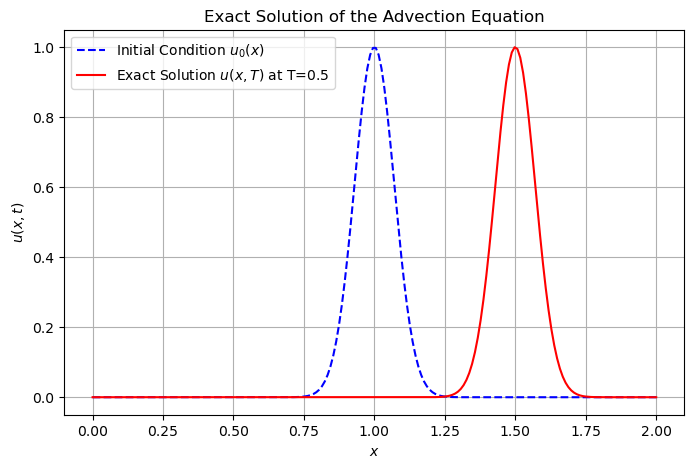

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 1.0  # Advection speed
x_min, x_max = 0, 2  # Domain
Nx = 200  # Number of spatial points
dx = (x_max - x_min) / Nx  # Space step
dt = dx  # Time step (CFL condition: dt = dx)
T = 0.5  # Final time
Nt = int(T / dt)  # Number of time steps

# Define spatial grid
x = np.linspace(x_min, x_max, Nx)

# Define initial condition u_0(x) (e.g., Gaussian pulse)
def u_0(x):
    return np.exp(-100 * (x - 1)**2)  # Gaussian function centered at x=1

# Compute exact solution at t = T
x_shifted = x - a * T  # Characteristic shift
u_exact = u_0(x_shifted)

# Plot initial and exact solutions
plt.figure(figsize=(8, 5))
plt.plot(x, u_0(x), 'b--', label="Initial Condition $u_0(x)$")
plt.plot(x, u_exact, 'r-', label="Exact Solution $u(x,T)$ at T=0.5")
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
plt.title("Exact Solution of the Advection Equation")
plt.legend()
plt.grid()
plt.show()


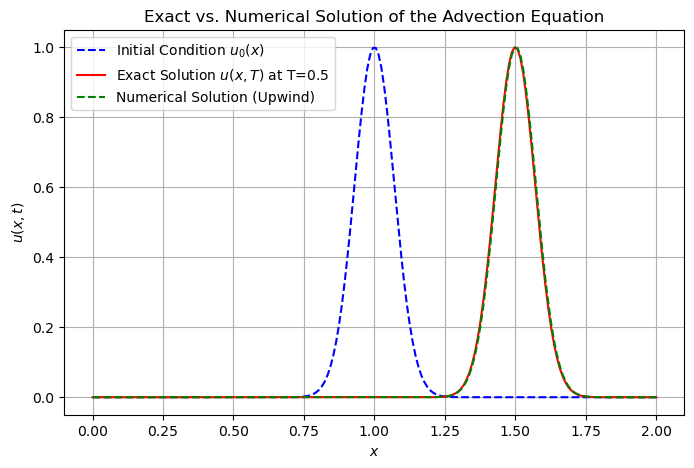

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a = 1.0  # Advection speed
x_min, x_max = 0, 2  # Domain
Nx = 200  # Number of spatial points
dx = (x_max - x_min) / Nx  # Space step
dt = dx  # Time step (CFL condition dt = dx)
T = 0.5  # Final time
Nt = int(T / dt)  # Number of time steps
lambda_1 = dt / dx  # CFL number

# Define spatial grid
x = np.linspace(x_min, x_max, Nx)

# Define initial condition u_0(x) (e.g., Gaussian pulse)
def u_0(x):
    return np.exp(-100 * (x - 1)**2)  # Gaussian function centered at x=1

# Compute exact solution at t = T
x_shifted = x - a * T  # Characteristic shift
u_exact = u_0(x_shifted)

# Initialize numerical solution
u_num = u_0(x)  # Initial condition

# Time stepping using upwind scheme
for n in range(Nt):
    u_num[1:] = u_num[1:] - a * lambda_1 * (u_num[1:] - u_num[:-1])  # Upwind scheme
    u_num[0] = u_0(0)  # Apply boundary condition (assume fixed at left boundary)

# Plot solutions
plt.figure(figsize=(8, 5))
plt.plot(x, u_0(x), 'b--', label="Initial Condition $u_0(x)$")
plt.plot(x, u_exact, 'r-', label="Exact Solution $u(x,T)$ at T=0.5")
plt.plot(x, u_num, 'g--', label="Numerical Solution (Upwind)")
plt.xlabel("$x$")
plt.ylabel("$u(x,t)$")
plt.title("Exact vs. Numerical Solution of the Advection Equation")
plt.legend()
plt.grid()
plt.show()


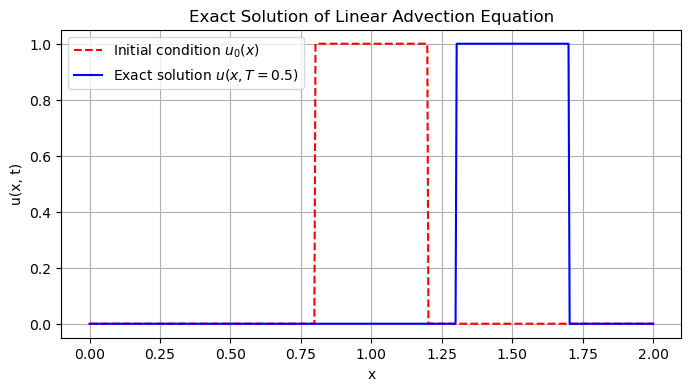

In [ ]:
# Given parameters
L_dom = 2.0    # Domain length
M = 500        # Number of grid points
dx = L_dom / M # Grid spacing
T = 0.5        # Final time
a = 1.0        # Advection speed
dt = dx        # Time step (CFL condition)
N_time = int(T / dt)  # Number of time steps

# Grid points
x = np.linspace(0, L_dom, M)

# Initial condition u0(x)
u0 = np.zeros(M)
u0[(x >= 0.8) & (x <= 1.2)] = 1.0  # Step function

# Compute exact solution: shift u0 by a*T to the right
x_shifted = x - a * T
u_exact = np.zeros_like(x)
for i in range(M):
    if 0.8 <= x_shifted[i] <= 1.2:
        u_exact[i] = 1.0

# Plot initial and exact solutions
plt.figure(figsize=(8, 4))
plt.plot(x, u0, 'r--', label="Initial condition $u_0(x)$")
plt.plot(x, u_exact, 'b-', label="Exact solution $u(x,T=0.5)$")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Exact Solution of Linear Advection Equation")
plt.legend()
plt.grid()
plt.show()


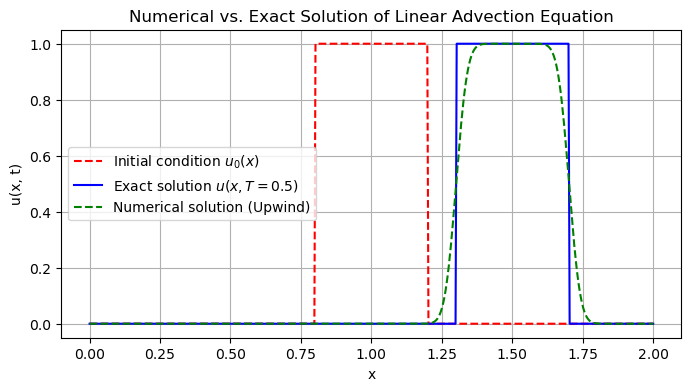

In [ ]:
# Given parameters
L_dom = 2.0    # Domain length
M = 500        # Number of grid points
dx = L_dom / M # Grid spacing
T = 0.5        # Final time
a = 1.0        # Advection speed
dt = 0.5 * dx        # Time step (CFL condition)
N_time = int(T / dt)  # Number of time steps
lambda1 = dt / dx  # CFL number

# Grid points
x = np.linspace(0, L_dom, M)

# Initial condition u0(x)
u0 = np.zeros(M)
u0[(x >= 0.8) & (x <= 1.2)] = 1.0  # Step function

# Compute exact solution: shift u0 by a*T to the right
x_shifted = x - a * T
u_exact = np.zeros_like(x)
for i in range(M):
    if 0.8 <= x_shifted[i] <= 1.2:
        u_exact[i] = 1.0

# Numerical solution using Upwind Scheme
u_num = np.copy(u0)  # Initialize numerical solution

for _ in range(N_time):
    u_num[1:] = u_num[1:] - a * lambda1 * (u_num[1:] - u_num[:-1])  # Upwind scheme

# Plot initial, exact, and numerical solutions
plt.figure(figsize=(8, 4))
plt.plot(x, u0, 'r--', label="Initial condition $u_0(x)$")
plt.plot(x, u_exact, 'b-', label="Exact solution $u(x,T=0.5)$")
plt.plot(x, u_num, 'g--', label="Numerical solution (Upwind)")
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Numerical vs. Exact Solution of Linear Advection Equation")
plt.legend()
plt.grid()
plt.show()


Linear problem II

Adjusted dt: 0.002, Number of time steps: 250
L2 error: 0.1283784942406033


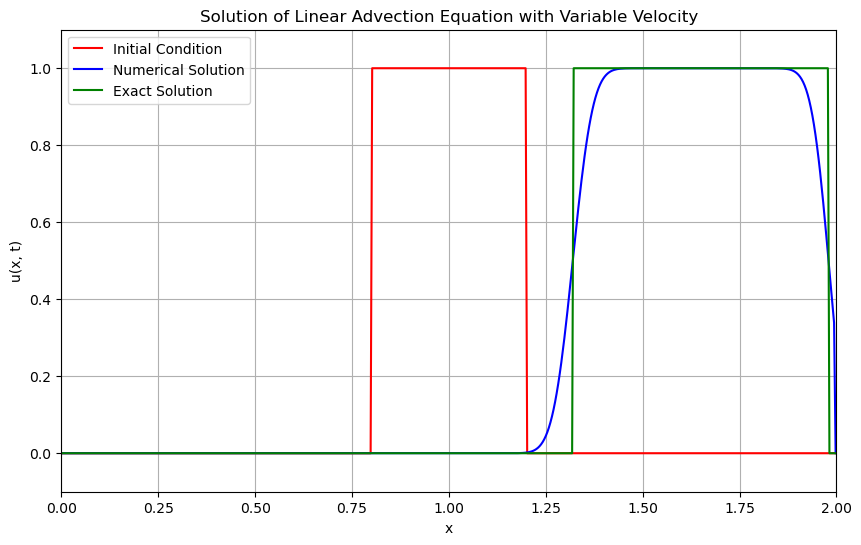

In [6]:
# Parameters
T = 0.5
M = 500  # Number of grid cells
Ldom = 2.0  # Length of the domain
dx = Ldom / M
x = np.arange(dx * 0.5, Ldom + 0.5 * dx, dx)
dt = dx / Ldom
NTime = int(T / dt)
lambda_1 = dt / dx

# Initial condition
def fun_initial(x):
    v = np.zeros_like(x)
    L = np.logical_and(x >= 0.8, x <= 1.2)
    v[L] = 1.0
    return v

u0 = fun_initial(x)
print(f"Adjusted dt: {dt}, Number of time steps: {NTime}")

# Numerical solution setup
u = np.zeros(M)
u_old = np.copy(u0)

# Time-stepping loop
for _ in range(NTime):
    u[1:-1] = u_old[1:-1] - lambda_1 * x[1:-1] * (u_old[1:-1] - u_old[:-2])
    u[0], u[-1] = u0[0], u0[-1]  # Boundary conditions
    u_old[:] = u

# Exact solution
y = x * np.exp(-T)
u_exact = fun_initial(y)

# Error calculation
error = np.sqrt(np.sum((u - u_exact) ** 2) * dx)
print(f"L2 error: {error}")

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, u0, '-r', label='Initial Condition')
plt.plot(x, u, '-b', label='Numerical Solution')
plt.plot(x, u_exact, '-g', label='Exact Solution')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Solution of Linear Advection Equation with Variable Velocity')
plt.axis([0, Ldom, -0.1, 1.1])
plt.grid(True)
plt.legend()
plt.show()


Linear problem III

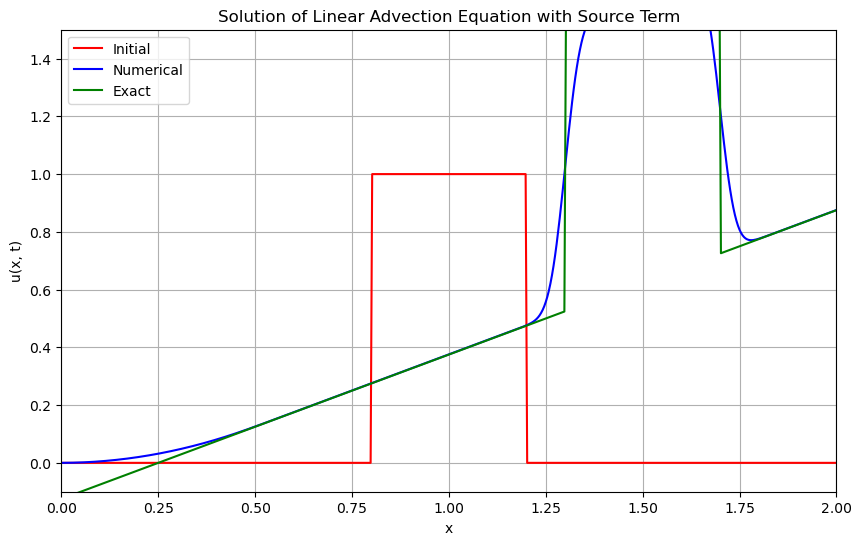

In [7]:
# Problem parameters
T = 0.5  # Final time
Ldom = 2  # Domain length [0, 2]
M = 500  # Number of grid points
dx = Ldom / M  # Spatial step
x = np.linspace(dx / 2, Ldom - dx / 2, M)  # Grid points
dt = dx / Ldom  # Time step to satisfy CFL condition
NTime = int(T / dt)  # Number of time steps
lambda_1 = dt / dx  # CFL number

# Initial condition
def fun_initial(x):
    u0 = np.zeros_like(x)
    u0[(x >= 0.8) & (x <= 1.2)] = 1.0
    return u0

u0 = fun_initial(x)

# Arrays for numerical and exact solutions
u = np.copy(u0)
u_old = np.copy(u0)

# Time-stepping loop
for _ in range(NTime):
    # Update using upwind scheme with source term
    u[1:] = u_old[1:] - lambda_1 * (u_old[1:] - u_old[:-1]) + dt * x[1:]
    u[0] = u0[0]  # Left boundary condition
    u_old[:] = u  # Update for next time step

# Exact solution
y = x - T  # Argument for initial condition
u_exact = fun_initial(y) + x * T - 0.5 * T**2

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x, u0, '-r', label='Initial')
plt.plot(x, u, '-b', label='Numerical')
plt.plot(x, u_exact, '-g', label='Exact')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.title('Solution of Linear Advection Equation with Source Term')
plt.axis([0, Ldom, -0.1, 1.5])
plt.grid(True)
plt.legend()
plt.show()

Task 3 c

In [ ]:
# Solution of u_t + 1*u_{x} = x

# Final Time
T = 30

# Number of grid cells
M = 100

# length of domain [0,20] 
Ldom = 20

# Delta x
dx = Ldom / M

# Define cell centers
x = np.arange(dx * 0.5, Ldom + 0.5 * dx, dx)

# Parameters for the simulation (diffusion, velocities, etc.)
Vp = 1
Vm = -1
D_0 = 0.4
N_0 = 0.1
N_L = 0.01
sigma_0 = 0.1
sigma_L = 0.1
k_p = 0.5
k_m = 0.5
k_ = 1.0
NTime = 60*5*2*2  # Number of time steps
dt = T / NTime  # Time step

# Vector for initial data n
def fun_initial_n(x, N_0, N_L, Ldom):
    v = np.zeros_like(x)
    v = N_0 + (N_L - N_0) * (x / Ldom)
    return v

n0 = fun_initial_n(x, N_0, N_L, Ldom)
np_0 = np.zeros_like(n0)
nm_0 = np.zeros_like(n0)

# CFL checks and initialization
lambda_1 = dt / dx  # advective eq
lambda_2 = dt / dx**2  # diffusive eq

# CFL constraints
def check_CFLconstraint_adv(value):
    if value > 1:
        print("CFL constraint not satisfied for advection. Stopping the program. Increase number time steps.")
        sys.exit()

def check_CFLconstraint_diff(value):
    if value > 0.5:
        print("CFL constraint not satisfied for diffusion. Stopping the program. Increase number time steps.")
        sys.exit()

CFL_number_adv = lambda_1 * max(np.abs(Vp), np.abs(Vm))
CFL_number_diff = lambda_2 * D_0
check_CFLconstraint_adv(CFL_number_adv)
check_CFLconstraint_diff(CFL_number_diff)

# Initialize solution vectors
n = np.copy(n0)
npp = np.copy(np_0)
nmm = np.copy(nm_0)

n_old = np.copy(n0)
npp_old = np.copy(np_0)
nmm_old = np.copy(nm_0)

# Time stepping loop
teller = 1
for j in range(NTime):
    # Calculate fluxes and update solution
    np_half = npp_old[:-1]  # advective flux + direction
    nm_half = nmm_old[1:]   # advective flux - direction
    Dn_half = (1 / dx) * (n_old[1:] - n_old[:-1])  # Diffusive flux

    # Numerical scheme (Interior cells)
    n[1:-1] = n_old[1:-1] + D_0 * lambda_1 * (Dn_half[1:] - Dn_half[:-1])
    npp[1:-1] = npp_old[1:-1] - Vp * lambda_1 * (np_half[1:] - np_half[:-1])
    nmm[1:-1] = nmm_old[1:-1] - Vm * lambda_1 * (nm_half[1:] - nm_half[:-1])

    # Boundary conditions
    n[0] = N_0
    npp[0] = N_0 * sigma_0
    nmm[0] = nmm[1]
    n[-1] = N_L
    npp[-1] = npp[-2]
    nmm[-1] = N_L * sigma_L

    # Plot every 100th time step (or adjust based on preference)
    if (j + 1) % 100 == 0:
        plt.clf()  # Clear the current figure to update
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))

        axs[0].plot(x, n0, '--r')
        axs[0].plot(x, np_0, '--g')
        axs[0].plot(x, nm_0, '--b')
        axs[0].plot(x, n + npp + nmm, '-c')
        axs[0].set_title("Density n, n_+, n_-")
        axs[0].set_ylabel("$n, n_+, n_-$")
        axs[0].set_xlabel("x")
        axs[0].axis([-0.1, Ldom + 0.1, -0.1, +0.2])
        axs[0].legend(['$n$', '$n_{+}$', '$n_{-}$', '$n+n_{+}+n_{-}$'])
        axs[0].grid(True)

        axs[1].plot(x, n0, '--r')
        axs[1].plot(x, n, '-r')
        axs[1].set_title("Diffusive transport")
        axs[1].set_ylabel("n")
        axs[1].set_xlabel("x")
        axs[1].axis([-0.1, Ldom + 0.1, -0.1, +0.2])
        axs[1].legend(['$n_0$', '$n$'])
        axs[1].grid(True)

        axs[2].plot(x, np_0, '--g')
        axs[2].plot(x, npp, '-g')
        axs[2].set_title("Advect + direction")
        axs[2].set_ylabel("$n_+$")
        axs[2].set_xlabel("x")
        axs[2].axis([-0.1, Ldom + 0.1, -0.01, +0.025])
        axs[2].legend(['$n_{+,0}$', '$n_{+}$'])
        axs[2].grid(True)

        axs[3].plot(x, nm_0, '--b')
        axs[3].plot(x, nmm, '-b')
        axs[3].set_title("Advect - direction")
        axs[3].set_ylabel("$n_-$")
        axs[3].set_xlabel("x")
        axs[3].axis([-0.1, Ldom + 0.1, -0.01, +0.025])
        axs[3].legend(['$n_{-,0}$', '$n_{-}$'])
        axs[3].grid(True)

        plt.show()
        current_time = (j + 1) * dt
        print(f"Timestep: {j + 1}", f"time =  {current_time:.2f}")

    # Update the old values for the next iteration
    n_old = np.copy(n)
    npp_old = np.copy(npp)
    nmm_old = np.copy(nmm)

print(f"Computation of numerical solution finished at final time T={(j + 1) * dt:.2f}")


Task 3 e

In [ ]:
# Solution of u_t + 1*u_{x} = x

# Final Time
T = 30

# Number of grid cells
M = 100

# length of domain [0,20] 
Ldom = 20

# Delta x
dx = Ldom / M

# Define cell centers
x = np.arange(dx * 0.5, Ldom + 0.5 * dx, dx)

# Parameters for the simulation (diffusion, velocities, etc.)
Vp = 1
Vm = -1
D_0 = 0.4
N_0 = 0.1
N_L = 0.01
sigma_0 = 0.1
sigma_L = 0.1
k_p = 0.01
k_m = 0.01
k_ = 0.01
NTime = 60*5*2*2  # Number of time steps
dt = T / NTime  # Time step

# Vector for initial data n
def fun_initial_n(x, N_0, N_L, Ldom):
    v = np.zeros_like(x)
    v = N_0 + (N_L - N_0) * (x / Ldom)
    return v

n0 = fun_initial_n(x, N_0, N_L, Ldom)
np_0 = np.zeros_like(n0)
nm_0 = np.zeros_like(n0)

# CFL checks and initialization
lambda_1 = dt / dx  # advective eq
lambda_2 = dt / dx**2  # diffusive eq

# CFL constraints
def check_CFLconstraint_adv(value):
    if value > 1:
        print("CFL constraint not satisfied for advection. Stopping the program. Increase number time steps.")
        sys.exit()

def check_CFLconstraint_diff(value):
    if value > 0.5:
        print("CFL constraint not satisfied for diffusion. Stopping the program. Increase number time steps.")
        sys.exit()

CFL_number_adv = lambda_1 * max(np.abs(Vp), np.abs(Vm))
CFL_number_diff = lambda_2 * D_0
check_CFLconstraint_adv(CFL_number_adv)
check_CFLconstraint_diff(CFL_number_diff)

# Initialize solution vectors
n = np.copy(n0)
npp = np.copy(np_0)
nmm = np.copy(nm_0)

n_old = np.copy(n0)
npp_old = np.copy(np_0)
nmm_old = np.copy(nm_0)

# Time stepping loop
teller = 1
for j in range(NTime):
    # Calculate fluxes and update solution
    np_half = npp_old[:-1]  # advective flux + direction
    nm_half = nmm_old[1:]   # advective flux - direction
    Dn_half = (1 / dx) * (n_old[1:] - n_old[:-1])  # Diffusive flux

    # Numerical scheme (Interior cells)
    #n[1:-1] = n_old[1:-1] + (D_0 - (1+km)) * lambda_1 * (Dn_half[1:] - Dn_half[:-1])
    npp[1:-1] = npp_old[1:-1] - lambda_1 * (np_half[1:] - np_half[:-1]) - npp_old[1:-1]*k_p
    nmm[1:-1] = nmm_old[1:-1] - Vm * lambda_1 * (nm_half[1:] - nm_half[:-1]) - nmm_old[1:-1]*k_m
    n[1:-1] = n_old[1:-1] + D_0 * lambda_1 * (Dn_half[1:] - Dn_half[:-1]) + k_m * nmm_old[1:-1] + k_p * npp_old[1:-1]


    # Boundary conditions
    n[0] = N_0
    npp[0] = N_0 * sigma_0
    nmm[0] = nmm[1]
    n[-1] = N_L
    npp[-1] = npp[-2]
    nmm[-1] = N_L * sigma_L

    # Plot every 100th time step (or adjust based on preference)
    if (j + 1) % 100 == 0:
        plt.clf()  # Clear the current figure to update
        fig, axs = plt.subplots(1, 4, figsize=(20, 5))

        axs[0].plot(x, n0, '--r')
        axs[0].plot(x, np_0, '--g')
        axs[0].plot(x, nm_0, '--b')
        axs[0].plot(x, n + npp + nmm, '-c')
        axs[0].set_title("Density n, n_+, n_-")
        axs[0].set_ylabel("$n, n_+, n_-$")
        axs[0].set_xlabel("x")
        axs[0].axis([-0.1, Ldom + 0.1, -0.1, +0.2])
        axs[0].legend(['$n$', '$n_{+}$', '$n_{-}$', '$n+n_{+}+n_{-}$'])
        axs[0].grid(True)

        axs[1].plot(x, n0, '--r')
        axs[1].plot(x, n, '-r')
        axs[1].set_title("Diffusive transport")
        axs[1].set_ylabel("n")
        axs[1].set_xlabel("x")
        axs[1].axis([-0.1, Ldom + 0.1, -0.1, +0.2])
        axs[1].legend(['$n_0$', '$n$'])
        axs[1].grid(True)

        axs[2].plot(x, np_0, '--g')
        axs[2].plot(x, npp, '-g')
        axs[2].set_title("Advect + direction")
        axs[2].set_ylabel("$n_+$")
        axs[2].set_xlabel("x")
        axs[2].axis([-0.1, Ldom + 0.1, -0.01, +0.025])
        axs[2].legend(['$n_{+,0}$', '$n_{+}$'])
        axs[2].grid(True)

        axs[3].plot(x, nm_0, '--b')
        axs[3].plot(x, nmm, '-b')
        axs[3].set_title("Advect - direction")
        axs[3].set_ylabel("$n_-$")
        axs[3].set_xlabel("x")
        axs[3].axis([-0.1, Ldom + 0.1, -0.01, +0.025])
        axs[3].legend(['$n_{-,0}$', '$n_{-}$'])
        axs[3].grid(True)

        plt.show()
        current_time = (j + 1) * dt
        print(f"Timestep: {j + 1}", f"time =  {current_time:.2f}")

    # Update the old values for the next iteration
    n_old = np.copy(n)
    npp_old = np.copy(npp)
    nmm_old = np.copy(nmm)

print(f"Computation of numerical solution finished at final time T={(j + 1) * dt:.2f}")


Task 3 - the rest

In [ ]:
# ==========================================================
# User can select model_mode from: '3c', '3d', '3e', '3f', '3g'
# '3c': Zero source terms (pure diffusion/advection)
# '3d': Attachment/detachment submodel (15): n_t = D0 n_xx - (1+k_minus)*n, 
#       (n+)_t + (n+)_x = n, (n-)_t + (Vm*n-)_x = k_minus*n
# '3e': Detachment-only submodel (16): n_t = D0 n_xx + k_p*n+ + k_n*n-, 
#       (n+)_t + (n+)_x = -k_p*n+, (n-)_t + (Vm*n-)_x = -k_n*n-
# '3f': Full model (13): n_t = D0 n_xx - (1+k_minus)*n + k_p*n+ + k_n*n-, 
#       (n+)_t + (n+)_x = n - k_p*n+, (n-)_t + (Vm*n-)_x = k_minus*n - k_n*n-
# '3g': Full model with hypothesis I: same source terms as (3f) but the advective
#       fluxes use f(u)= u * exp(-A*u) (with positive for n+ and negative for n-) 
#       and velocity becomes V(u)= Vp*exp(-A*u) or -Vp*exp(-A*u).
# ==========================================================
model_mode = '3f'  # change to '3c', '3d', '3e', '3f', or '3g'

# ==========================================================
# Domain and time parameters
T = 30                   # Final simulation time
M = 100                  # Number of grid cells
Ldom = 20                # Domain [0, Ldom]
dx = Ldom / M            # Grid spacing
x = np.linspace(dx/2, Ldom - dx/2, M)  # cell centers

# Time step parameters
NTime = 60*5*2*2         # Total number of time steps (adjust as needed)
dt = T / NTime           # Time step

# ==========================================================
# Model parameters (dimensionless)
Vp = 1.0                 # reference velocity for n+ (positive direction)
Vm = -1.0                # reference velocity for n- (negative direction)
D0 = 0.4                 # diffusion coefficient for n

N0 = 0.1                 # free particle concentration at x=0
NL = 0.01                # free particle concentration at x=L
sigma0 = 0.1             # loading degree at x=0 for n+
sigmaL = 0.1             # loading degree at x=L for n-

# Kinetic rate coefficients (for attachment/detachment)
k_p = 0.5                # detachment rate for n+ 
k_n = 0.5                # detachment rate for n- 
k_minus = 1.0            # binding rate for minus direction (used as in submodels)

# For hypothesis I (model 3g) parameter A and flux dissipation parameter M_flux:
A = 2.0                  # Adjust A between 0 and 10 for testing hypothesis I
M_flux = 1.0             # Numerical dissipation constant in flux discretization

# ==========================================================
# CFL constraints for standard upwind and diffusion
lambda_adv = dt / dx    # advective CFL factor
lambda_diff = dt / dx**2  # diffusive CFL factor

def check_CFLconstraint_adv(value):
    if value > 1:
        print("CFL constraint not satisfied for advection. Increase NTime.")
        sys.exit()

def check_CFLconstraint_diff(value):
    if value > 0.5:
        print("CFL constraint not satisfied for diffusion. Increase NTime.")
        sys.exit()

CFL_adv = lambda_adv * max(np.abs(Vp), np.abs(Vm))
CFL_diff = lambda_diff * D0
check_CFLconstraint_adv(CFL_adv)
check_CFLconstraint_diff(CFL_diff)

# ==========================================================
# Initial conditions
def fun_initial_n(x, N0, NL, Ldom):
    return N0 + (NL - N0) * (x / Ldom)

n0 = fun_initial_n(x, N0, NL, Ldom)
nplus0 = np.zeros_like(n0)
nminus0 = np.zeros_like(n0)

# Initialize solution arrays for n, n+, n-
n = np.copy(n0)
nplus = np.copy(nplus0)
nminus = np.copy(nminus0)

# To store old solution (for time stepping)
n_old = np.copy(n)
nplus_old = np.copy(nplus)
nminus_old = np.copy(nminus)

# ==========================================================
# For model 3g: define flux functions using hypothesis I
def flux_plus(u):
    # f(u) = u * exp(-A*u)
    return u * np.exp(-A * u)

def flux_minus(u):
    # f(u) = -u * exp(-A*u)
    return - u * np.exp(-A * u)

# ==========================================================
# Main time stepping loop
print(f"Starting simulation for model {model_mode}...")
for j in range(NTime):
    # Copy current state for update (explicit Euler)
    n_old[:] = n
    nplus_old[:] = nplus
    nminus_old[:] = nminus

    # -----------------------------
    # Compute diffusion term for n (central difference)
    # For interior points, second derivative approximation:
    diffusion = np.zeros_like(n_old)
    diffusion[1:-1] = D0 * (n_old[2:] - 2*n_old[1:-1] + n_old[:-2]) / dx**2

    # -----------------------------
    # Update for n: depends on the model
    if model_mode in ['3c', '3d', '3e', '3f', '3g']:
        # Base update for n: diffusion plus source terms (if any)
        n_update = n_old + dt * diffusion

        if model_mode == '3d':
            # Submodel (15): n_t = D0 n_xx - (1+k_minus)*n
            n_update += dt * ( - (1 + k_minus) * n_old )
        elif model_mode == '3e':
            # Submodel (16): n_t = D0 n_xx + k_p*nplus_old + k_n*nminus_old
            n_update += dt * ( k_p * nplus_old + k_n * nminus_old )
        elif model_mode == '3f' or model_mode == '3g':
            # Full model (13): n_t = D0 n_xx - (1+k_minus)*n + k_p*nplus_old + k_n*nminus_old
            n_update += dt * ( - (1 + k_minus) * n_old + k_p * nplus_old + k_n * nminus_old )
        # For model 3c there is no source term.
        n = n_update

    # -----------------------------
    # Update for n+ and n-
    # For models 3c,3d,3e,3f: use standard upwind scheme for advection with constant velocities
    if model_mode in ['3c', '3d', '3e', '3f']:
        # For n+ (advected with velocity Vp):
        nplus_update = np.copy(nplus_old)
        # Upwind difference for n+: use left differences (assuming Vp > 0)
        nplus_update[1:] = nplus_old[1:] - Vp * lambda_adv * (nplus_old[1:] - nplus_old[:-1])
        # For n-, advected with Vm (Vm is negative so upwind uses right differences)
        nminus_update = np.copy(nminus_old)
        nminus_update[:-1] = nminus_old[:-1] - Vm * lambda_adv * (nminus_old[1:] - nminus_old[:-1])
        
        # Add source terms if applicable:
        if model_mode == '3d':
            # (n+)_t + (n+)_x = n
            nplus_update += dt * ( n_old )
            # (n-)_t + (Vm*n-)_x = k_minus * n
            nminus_update += dt * ( k_minus * n_old )
        elif model_mode == '3e':
            # (n+)_t + (n+)_x = - k_p * nplus_old
            nplus_update += dt * ( - k_p * nplus_old )
            # (n-)_t + (Vm*n-)_x = - k_n * nminus_old
            nminus_update += dt * ( - k_n * nminus_old )
        elif model_mode in ['3f']:
            # Full model:
            # (n+)_t + (n+)_x = n - k_p * nplus_old
            nplus_update += dt * ( n_old - k_p * nplus_old )
            # (n-)_t + (Vm*n-)_x = k_minus * n - k_n * nminus_old
            nminus_update += dt * ( k_minus * n_old - k_n * nminus_old )
        
        nplus = nplus_update
        nminus = nminus_update

    # For model 3g: use flux discretization for the advective terms
    if model_mode == '3g':
        # n+ update: (n+)_t + d/dx[f_plus(n+)] = n - k_p*n+
        nplus_flux = np.zeros_like(nplus_old)
        # Compute numerical flux for n+ at interfaces
        for i in range(M-1):
            fL = flux_plus(nplus_old[i])
            fR = flux_plus(nplus_old[i+1])
            # Lax-Friedrichs flux:
            F_half = 0.5*(fL + fR) - 0.5*M_flux*(nplus_old[i+1] - nplus_old[i])
            nplus_flux[i+1] = F_half
        # Compute derivative (difference between interfaces)
        dFdx_plus = np.zeros_like(nplus_old)
        dFdx_plus[1:-1] = (nplus_flux[2:] - nplus_flux[1:-1]) / dx
        # Update n+:
        nplus = nplus_old - dt * dFdx_plus + dt * ( n_old - k_p * nplus_old )

        # n- update: (n-)_t + d/dx[f_minus(n-)] = k_minus*n - k_n*n-
        nminus_flux = np.zeros_like(nminus_old)
        for i in range(M-1):
            fL = flux_minus(nminus_old[i])
            fR = flux_minus(nminus_old[i+1])
            F_half = 0.5*(fL + fR) - 0.5*M_flux*(nminus_old[i+1] - nminus_old[i])
            nminus_flux[i+1] = F_half
        dFdx_minus = np.zeros_like(nminus_old)
        dFdx_minus[1:-1] = (nminus_flux[2:] - nminus_flux[1:-1]) / dx
        nminus = nminus_old - dt * dFdx_minus + dt * ( k_minus * n_old - k_n * nminus_old )

    # -----------------------------
    # Boundary conditions
    # For n: Dirichlet BC at both ends
    n[0] = N0
    n[-1] = NL
    # For n+: BC at x=0 (set value) and Neumann at x=L (copy interior)
    nplus[0] = N0 * sigma0
    nplus[-1] = nplus[-2]
    # For n-: BC at x=L (set value) and Neumann at x=0 (copy interior)
    nminus[-1] = NL * sigmaL
    nminus[0] = nminus[1]

    # -----------------------------
    # Plot every 100 time steps
    if (j+1) % 100 == 0:
        plt.clf()
        fig, axs = plt.subplots(1, 4, figsize=(20,5))

        # Plot initial conditions (dashed) and current solution
        axs[0].plot(x, n0, '--r', label='n0')
        axs[0].plot(x, nplus0, '--g', label='n+0')
        axs[0].plot(x, nminus0, '--b', label='n-0')
        axs[0].plot(x, n + nplus + nminus, '-c', label='Total')
        axs[0].set_title("Density: n, n+, n- and Total")
        axs[0].set_xlabel("x")
        axs[0].axis([-0.1, Ldom, -0.01, +0.2])
        axs[0].legend()
        axs[0].grid(True)

        axs[1].plot(x, n0, '--r', label='n0')
        axs[1].plot(x, n, '-r', label='n')
        axs[1].set_title("Diffusive transport")
        axs[1].set_xlabel("x")
        axs[1].axis([-0.1, Ldom, -0.01, +0.2])
        axs[1].legend()
        axs[1].grid(True)

        axs[2].plot(x, nplus0, '--g', label='n+0')
        axs[2].plot(x, nplus, '-g', label='n+')
        axs[2].set_title("Advect + direction")
        axs[2].set_xlabel("x")
        axs[2].axis([-0.1, Ldom, -0.01, +0.1])
        axs[2].legend()
        axs[2].grid(True)

        axs[3].plot(x, nminus0, '--b', label='n-0')
        axs[3].plot(x, nminus, '-b', label='n-')
        axs[3].set_title("Advect - direction")
        axs[3].set_xlabel("x")
        axs[3].axis([-0.1, Ldom, -0.01, +0.1])
        axs[3].legend()
        axs[3].grid(True)

        plt.tight_layout()
        plt.show()
        current_time = (j+1)*dt
        print(f"Time step {j+1}, time = {current_time:.2f}")

print(f"Computation finished at final time T={(j+1)*dt:.2f}")
